# 🎊 Learning PyTorch at `My Pace` 🤗

## Know Your System and Install

In [2]:
!lscpu |grep 'Model name'
!lsmem |grep 'Total'

Model name:                         AMD EPYC 7R32
Total online memory:    15.9G
Total offline memory:      0B


In [3]:
!nvidia-smi ## May or May not have your GPU lol

Wed Oct  4 11:22:33 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 470.57.02    CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A10G         Off  | 00000000:00:1E.0 Off |                    0 |
|  0%   26C    P0    25W / 300W |      0MiB / 22731MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Install PyTorch if not yet

In [21]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 MB 3.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.4 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 30.2 MB/s eta 0:00:00:00:01


## Time to Play, with `Tensor`s 🃏

In [22]:
import torch
import numpy as np

### Convert `things` to tensors AT YOUR WILL

**You can do normal `np.array`s**

In [32]:
data_array = np.array([[1, 2],[3, 4]])
print(data_array.dtype)
print(data_array.shape)
print(type(data_array))

int64
(2, 2)
<class 'numpy.ndarray'>


In [33]:
data_array_t = torch.tensor(data_array)
print(data_array_t.dtype)
print(data_array_t.shape)
print(type(data_array_t))

torch.int64
torch.Size([2, 2])
<class 'torch.Tensor'>


**Can do like a `list`**

In [31]:
data_list = [[ 1, 2 ],
             [3, 4],]
print(len(data_list))
print(type(data_list))

2
<class 'list'>


In [34]:
data_list_t = torch.tensor(data_list)
print(data_list_t.dtype)
print(data_list_t.shape)
print(type(data_list_t))

torch.int64
torch.Size([2, 2])
<class 'torch.Tensor'>


**Can do other `tensor`s**
Notes:
- When you use `torch.ones_like` or `torch.rand_like`, only put in a `Tensor`

In [39]:
ones_t = torch.ones_like(data_array_t) 
ones_t

tensor([[1, 1],
        [1, 1]])

In [46]:
rand_t = torch.rand_like(data_array_t, dtype = torch.float64)  #! dtype only takes `torch.dtype`
rand_t

tensor([[0.8358, 0.1689],
        [0.6136, 0.6609]], dtype=torch.float64)

In [52]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: shape {rand_tensor.shape} \n {rand_tensor} \n")
print(f"Ones Tensor: shape {rand_tensor.shape} \n {ones_tensor} \n")
print(f"Zeros Tensor: shape {rand_tensor.shape} \n {zeros_tensor}")

Random Tensor: shape torch.Size([2, 3]) 
 tensor([[0.0384, 0.7548, 0.5116],
        [0.9969, 0.0640, 0.0423]]) 

Ones Tensor: shape torch.Size([2, 3]) 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: shape torch.Size([2, 3]) 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### Operations on `Tensors`

***Inspect a `Tensor`***

In [59]:
tensor = torch.rand((3,4,2), dtype = torch.float64)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4, 2])
Datatype of tensor: torch.float64
Device tensor is stored on: cpu


In [61]:
if torch.cuda.is_available():
    print("cuda is available")
    tensor = tensor.to("cuda")

In [70]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,2] = 4
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 1., 4., 1.],
        [1., 1., 4., 1.],
        [1., 1., 4., 1.],
        [1., 1., 4., 1.]])


In [71]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 1., 4., 1., 1., 1., 4., 1., 1., 1., 4., 1.],
        [1., 1., 4., 1., 1., 1., 4., 1., 1., 1., 4., 1.],
        [1., 1., 4., 1., 1., 1., 4., 1., 1., 1., 4., 1.],
        [1., 1., 4., 1., 1., 1., 4., 1., 1., 1., 4., 1.]])


In [72]:
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

In [73]:
y1

tensor([[19., 19., 19., 19.],
        [19., 19., 19., 19.],
        [19., 19., 19., 19.],
        [19., 19., 19., 19.]])

In [74]:
y2

tensor([[19., 19., 19., 19.],
        [19., 19., 19., 19.],
        [19., 19., 19., 19.],
        [19., 19., 19., 19.]])

In [78]:
y3 = torch.ones_like(y1)
torch.matmul(tensor, tensor.T, out=y3)

tensor([[19., 19., 19., 19.],
        [19., 19., 19., 19.],
        [19., 19., 19., 19.],
        [19., 19., 19., 19.]])

In [80]:
z1= tensor * tensor
z1

tensor([[ 1.,  1., 16.,  1.],
        [ 1.,  1., 16.,  1.],
        [ 1.,  1., 16.,  1.],
        [ 1.,  1., 16.,  1.]])

In [81]:
agg = tensor.sum()

In [82]:
agg

tensor(28.)

## Automatic Differentiation w/ `torch.autograd`

In [2]:
# First Things First, Import
import torch

### Basics
> You can set the value of `requires_grad` when creating a tensor, or later by using `{}.requires_grad_(True)` method.
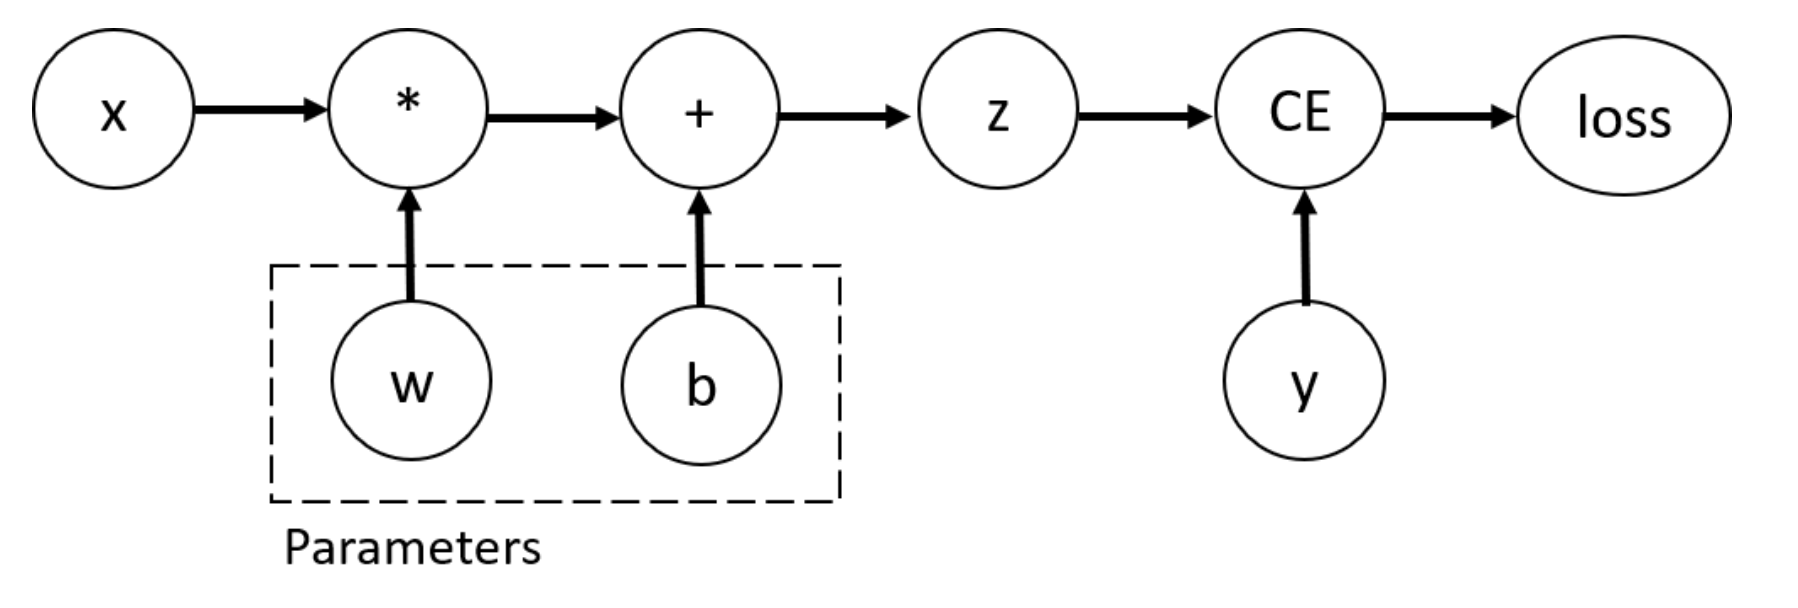

In [25]:
x = torch.ones(5)
y = torch.zeros(3)
w = torch.randn(5,3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x,w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [17]:
m = torch.randn(1,4)
n = torch.randn(4,3)
torch.matmul(m,n)

tensor([[0.0852, 0.0822, 0.8112]])

In [26]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")
loss.backward()
print(w.grad)
print(b.grad)

Gradient function for z = <AddBackward0 object at 0x7f2ff73d8310>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7f2ff73d80a0>
tensor([[0.1012, 0.0830, 0.1088],
        [0.1012, 0.0830, 0.1088],
        [0.1012, 0.0830, 0.1088],
        [0.1012, 0.0830, 0.1088],
        [0.1012, 0.0830, 0.1088]])
tensor([0.1012, 0.0830, 0.1088])


## Build An NN

In [27]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [28]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [30]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [31]:
layer1 = nn.Linear(28*28, 20)

In [32]:
layer1

Linear(in_features=784, out_features=20, bias=True)

## RUN `FOOOCUS`

In [4]:
%cd /content
!git clone -b v1.0.43 https://github.com/camenduru/Fooocus

!apt -y update -qq
!wget https://github.com/camenduru/gperftools/releases/download/v1.0/libtcmalloc_minimal.so.4 -O /content/libtcmalloc_minimal.so.4
%env LD_PRELOAD=/content/libtcmalloc_minimal.so.4

!pip install torchsde==0.2.5 einops==0.4.1 transformers==4.30.2 safetensors==0.3.1 accelerate==0.21.0
!pip install pytorch_lightning==1.9.4 omegaconf==2.2.3 gradio==3.39.0 xformers==0.0.20 triton==2.0.0 pygit2==1.12.2

!apt -y install -qq aria2
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/juggernaut-xl/resolve/main/juggernautXL_version1.safetensors -d /content/Fooocus/models/checkpoints -o juggernautXL_version1.safetensors
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/juggernaut-xl/resolve/main/sdxl_vae.safetensors -d /content/Fooocus/models/vea -o sdxl_vae.safetensors
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/juggernaut-xl/resolve/main/JuggerCineXL2.safetensors -d /content/Fooocus/models/loras -o JuggerCineXL2.safetensors

[Errno 2] No such file or directory: '/content'
/root/Visual/ML-open
Cloning into 'Fooocus'...
remote: Enumerating objects: 1874, done.
remote: Counting objects: 100% (684/684), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 1874 (delta 650), reused 622 (delta 622), pack-reused 1190
Receiving objects: 100% (1874/1874), 22.93 MiB | 38.18 MiB/s, done.
Resolving deltas: 100% (1152/1152), done.
14 packages can be upgraded. Run 'apt list --upgradable' to see them.
/content/libtcmalloc_minimal.so.4: No such file or directory
env: LD_PRELOAD=/content/libtcmalloc_minimal.so.4
ERROR: ld.so: object '/content/libtcmalloc_minimal.so.4' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/content/libtcmalloc_minimal.so.4' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 1.4 MB/s eta 0:00:00ta 0:00:01
  Obtaining dependency information for tr

In [12]:
%ls
!python launch.py --share

ERROR: ld.so: object '/content/libtcmalloc_minimal.so.4' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/content/libtcmalloc_minimal.so.4' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
models/
ERROR: ld.so: object '/content/libtcmalloc_minimal.so.4' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/content/libtcmalloc_minimal.so.4' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
python: can't open file '/content/Fooocus/launch.py': [Errno 2] No such file or directory


In [9]:
!git status

ERROR: ld.so: object '/content/libtcmalloc_minimal.so.4' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/content/libtcmalloc_minimal.so.4' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
fatal: not a git repository (or any of the parent directories): .git
